# Requirements:
1. Visualize a sound file as a signal

2. Collect a list of methods to classify bird sound from the literature, starting from e.g. Automated bird sound recognition in realistic settings and its references.

3. Visualize multiple audio signals and their 2D spectrograms to facilitate visual inspection and comparison

4. Although automated classification can be applied to Kasios sound files, find some visual features that can be highlighted in the visualization to help understand the most important features for discriminating bird sounds? You don't need to be 100% successful of course.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from pydub import AudioSegment
import scipy as sp
from scipy.io import wavfile
from scipy import signal
from scipy.fftpack import fft
import seaborn as sns
import os
sns.set()
%matplotlib inline

## Visualize a sound file as a signal

In [52]:
#transform from .mp3 to .wav
path = "/Users/shangyuanzhang/Documents/student/X/visualisation/github"

sound = AudioSegment.from_mp3(path + "/data_2/ALL BIRDS/Bent-Beak-Riffraff-73461.mp3")
sound.export(path + "/data_2/birds_wav/Bent-Beak-Riffraff-73461.wav", format="wav")


<_io.BufferedRandom name='/Users/shangyuanzhang/Documents/student/X/visualisation/github/data_2/birds_wav/Bent-Beak-Riffraff-73461.wav'>

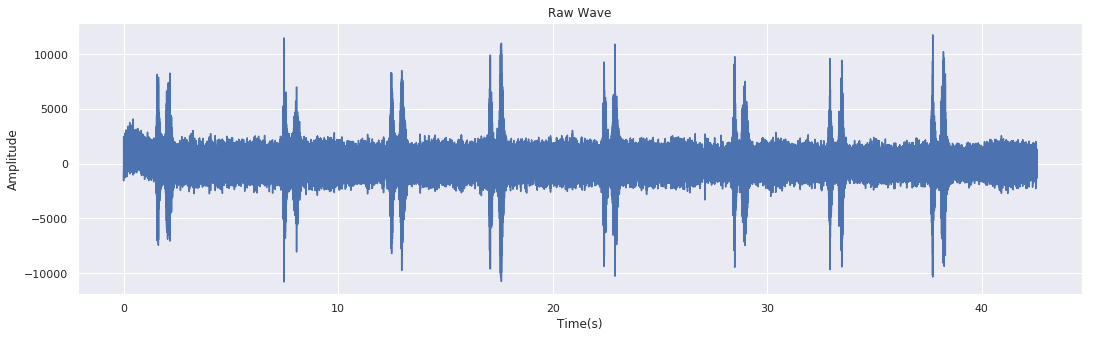

In [152]:
#read file and show raw image
rate,test1 = wavfile.read(path + "/data_2/birds_wav/Bent-Beak-Riffraff-73461.wav",'r')

Time=np.linspace(0, len(test1)/rate, num=len(test1))

plt.figure(figsize=(18,5))
plt.title('Raw Wave')
plt.plot(Time,test1,"b")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

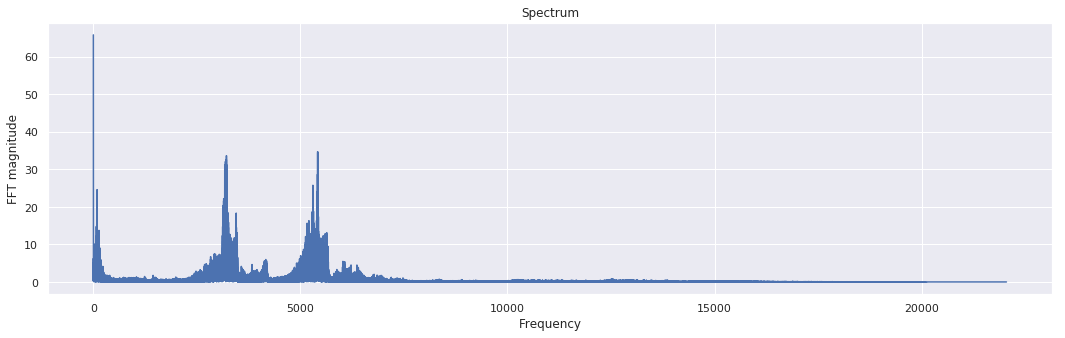

In [153]:
n_sample = len(test1)
sample_space = 1.0/rate

xf = np.linspace(0.0, 1.0/(2.0*sample_space),n_sample//2)

plt.figure(figsize=(18,5))
plt.plot(xf, 2.0/n_sample * np.abs(fft(test1)[0:n_sample//2]),"b")
plt.title('Spectrum')
plt.ylabel('FFT magnitude')
plt.xlabel('Frequency')
plt.show()

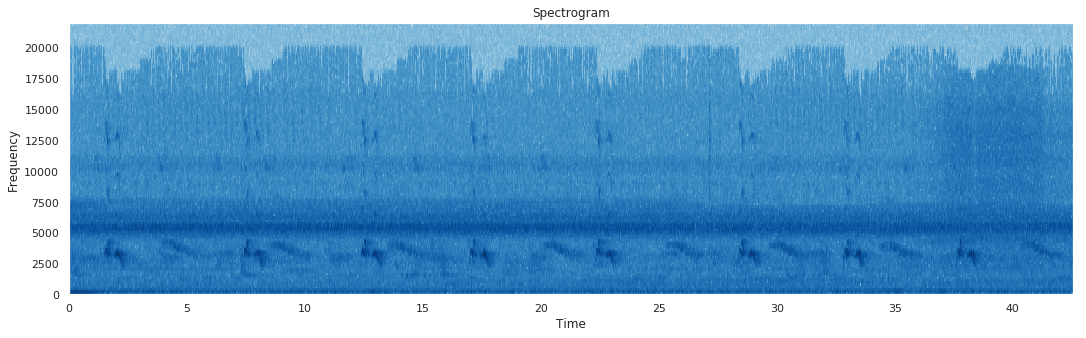

In [155]:
plt.figure(figsize=(18,5))
plt.title('Spectrogram')
plt.specgram(test1, Fs=rate,cmap='Blues')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.grid(False)
plt.show() 

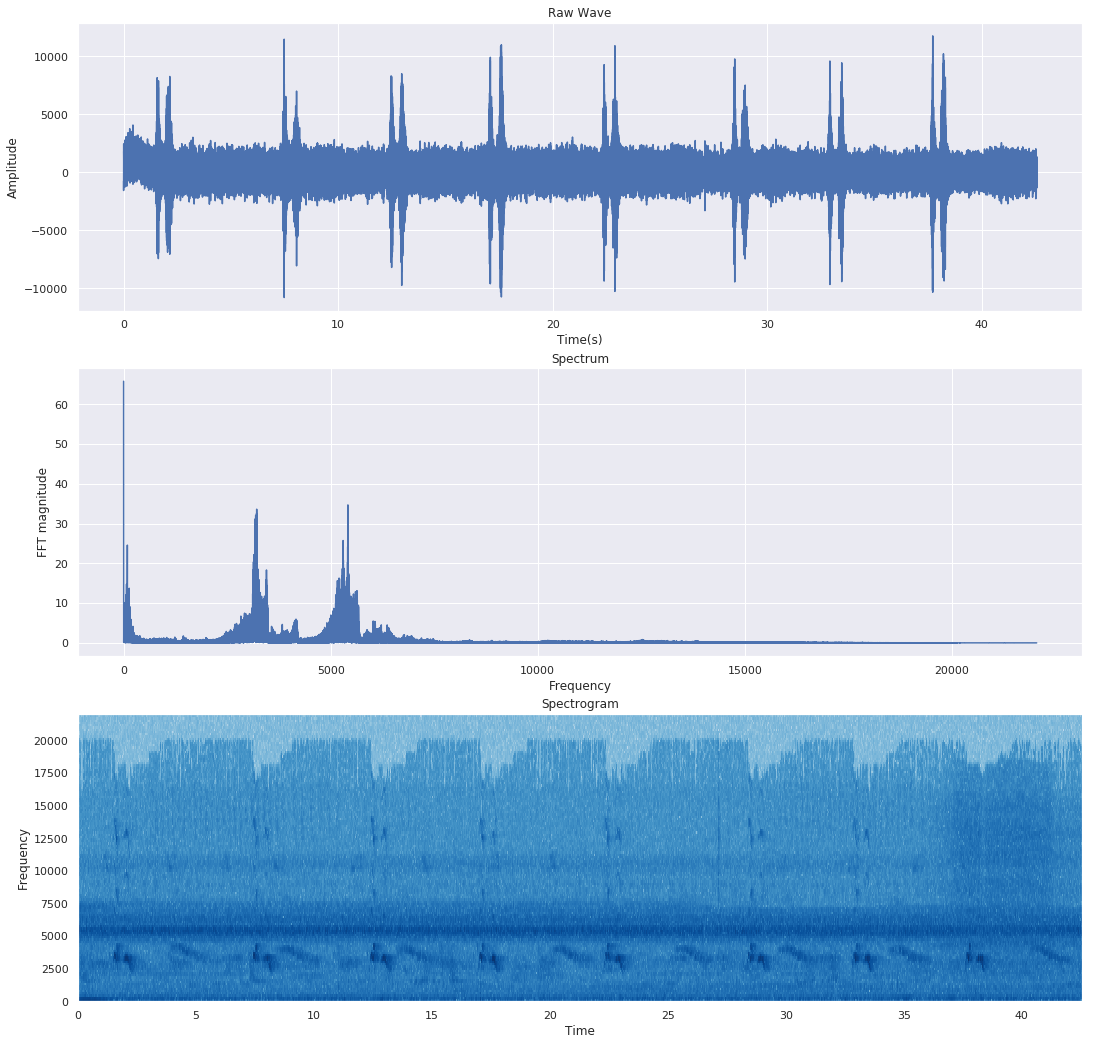

In [150]:
#show information together for an example
fig, [ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1,figsize=(18,18))
ax1.set_title('Raw Wave')
ax1.plot(Time,test1,"b")
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Amplitude")


ax2.plot(xf, 2.0/n_sample * np.abs(fft(test1)[0:n_sample//2]),"b")
ax2.set_title('Spectrum')
ax2.set_ylabel('FFT magnitude')
ax2.set_xlabel('Frequency')

ax3.set_title('Spectrogram')
ax3.specgram(test1, Fs=rate,cmap='Blues')
ax3.set_xlabel('Time')
ax3.set_ylabel('Frequency')
ax3.grid(False)

plt.show()

## Methods to classify bird sound

1. k Nearest Neighbour (kNN) classifier with histogram-based features.   
  
    
2. Support Vector Machine (SVM) with time- summarisation features.  
  
  
3. Threshold selection method to separate clean bird sound from silence in the crowd-sourced recordings of the training dataset.  
  
  
4. Standard FFT-based spectrograms to get features. 

## Visualize multiple audio signals and their 2D spectrograms

In [177]:
#transform all mp3 files to wav
for file in os.listdir('data_2/ALL BIRDS/'):
    sound = AudioSegment.from_mp3("data_2/ALL BIRDS/" + file)
    sound.export("data_2/birds_wav/" + file.split('.')[0] + ".wav", format="wav")

In [2]:
#get all birds name in dataset
birds_name = set()

for file in os.listdir('data_2/ALL BIRDS/'):
    birds_name.add('-'.join(file.split('-')[:-1]))


In [3]:
birds_name = list(birds_name)
sample_birds = []

for name in birds_name:
    for name2 in os.listdir('data_2/birds_wav/'):
        if '-'.join(name2.split('-')[:-1]) == name:
            sample_birds.append(name2)
            break

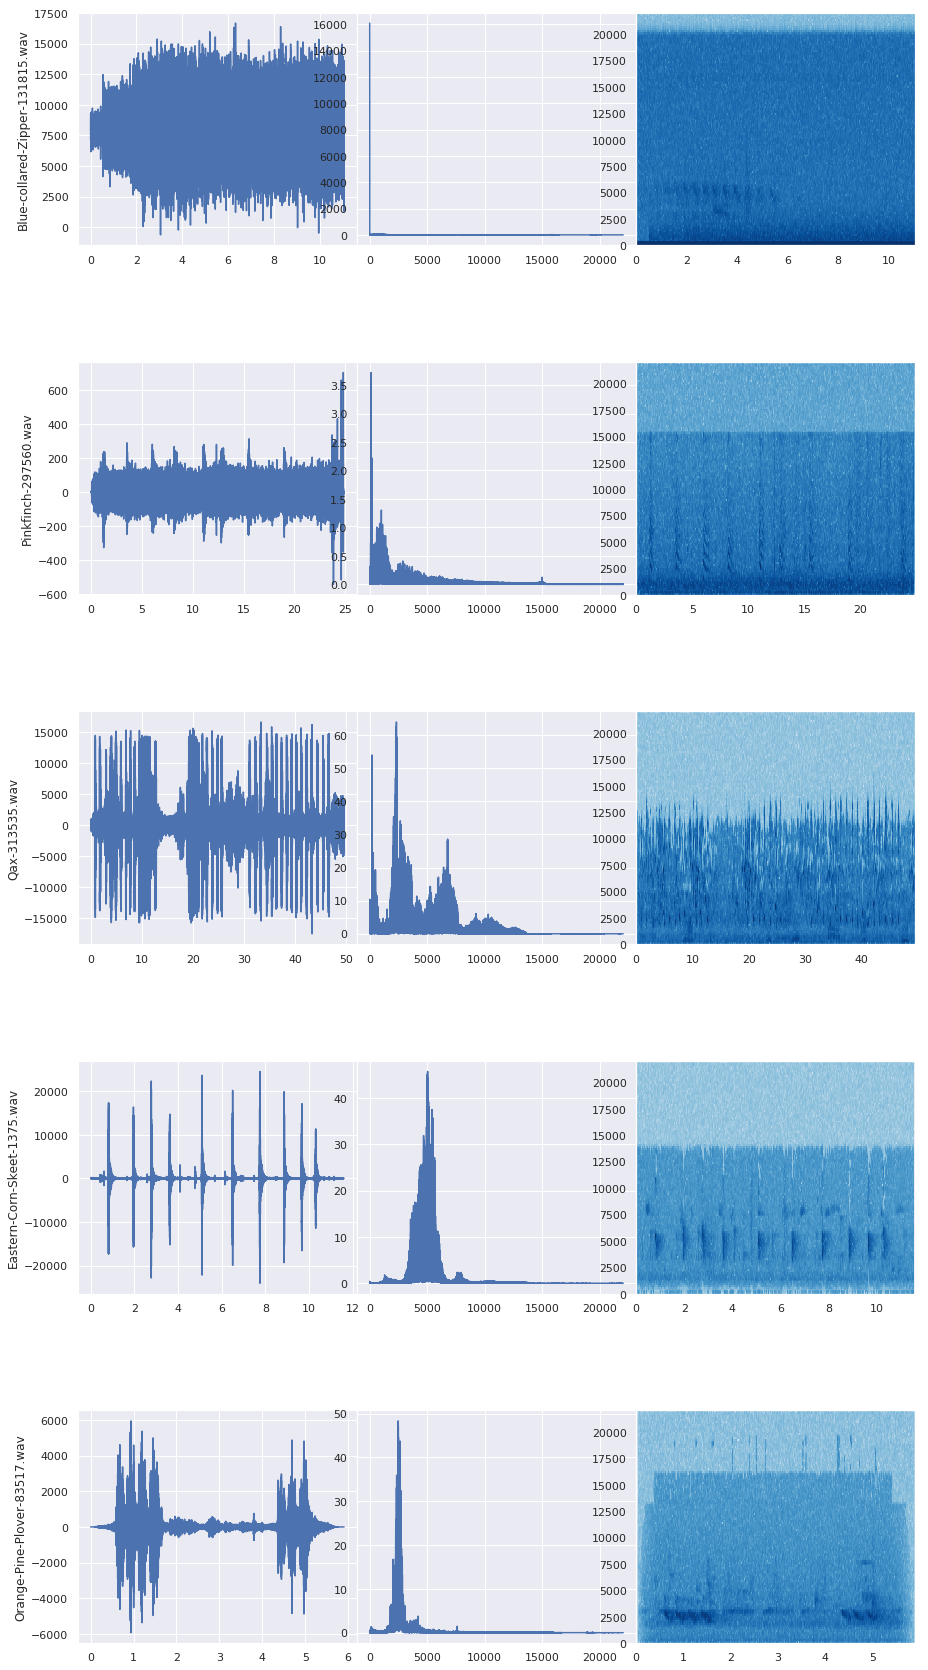

In [13]:
#plot multiple audio signals and their 2D spectrograms
fig, axs = plt.subplots(5,3, figsize=(15, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
index = 0

for i in range(5):
    
    rate,test1 = wavfile.read("data_2/birds_wav/" + sample_birds[i],'r')
    if test1.ndim != 1:
        test1 = test1[:,0]
    Time=np.linspace(0, len(test1)/rate, num=len(test1))
    
    n_sample = len(test1)
    sample_space = 1.0/rate
    xf = np.linspace(0.0, 1.0/(2.0*sample_space),n_sample//2)
    
    #axs[index].set_title('Raw Wave')
    axs[index].plot(Time,test1,"b")
    #axs[index].set_xlabel("Time(s)")
    axs[index].set_ylabel(sample_birds[i])


    axs[index+1].plot(xf, 2.0/n_sample * np.abs(fft(test1)[0:n_sample//2]),"b")
    #axs[index+1].set_title('Spectrum')
    #axs[index+1].set_ylabel('FFT magnitude')
    #axs[index+1].set_xlabel('Frequency')

    #axs[index+2].set_title('Spectrogram')
    axs[index+2].specgram(test1, Fs=rate,cmap='Blues')
    #axs[index+2].set_xlabel('Time')
    #axs[index+2].set_ylabel('Frequency')
    axs[index+2].grid(False)
    
    index += 3

plt.show()

## Visual features that can be highlighted

For me, the distribution of the frequency and the pattern of spectrogram are visual features that can be highlighted.

## ML methods by article